In [1]:
import numpy as pd 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
dataset= pd.read_csv("employee_attrition_train.csv")
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [10]:
# Fill missing values for numeric columns with their mean
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Fill missing values for categorical columns with their mode
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

C:\Users\ARFA TECH\AppData\Local\Temp\ipykernel_17364\102115880.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [19]:
dataset.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,50.0,0,1126.0,1.000000,2,1,997,4,1,66,...,False,False,False,True,False,False,False,False,False,False
1,36.0,0,216.0,6.000000,2,1,178,2,1,84,...,False,False,True,False,False,False,False,False,False,False
2,21.0,1,337.0,7.000000,1,1,1780,2,1,31,...,False,False,False,False,False,False,True,False,True,False
3,50.0,0,1246.0,9.930407,3,1,644,1,1,99,...,False,True,False,False,False,False,False,True,False,False
4,52.0,0,994.0,7.000000,4,1,1118,2,1,87,...,False,False,False,False,False,False,False,False,True,False


In [22]:
# Drop irrelevant columns from the dataset
irrelevant_features = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']
dataset = dataset.drop(columns=irrelevant_features)

In [23]:
dataset.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,50.0,0,1126.0,1.000000,2,4,1,66,3,4,...,False,False,False,True,False,False,False,False,False,False
1,36.0,0,216.0,6.000000,2,2,1,84,3,2,...,False,False,True,False,False,False,False,False,False,False
2,21.0,1,337.0,7.000000,1,2,1,31,3,1,...,False,False,False,False,False,False,True,False,True,False
3,50.0,0,1246.0,9.930407,3,1,1,99,3,5,...,False,True,False,False,False,False,False,True,False,False
4,52.0,0,994.0,7.000000,4,2,1,87,3,3,...,False,False,False,False,False,False,False,False,True,False


In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [27]:
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.379653,0,0.808586,-1.113611e+00,2,4,1,-0.033242,3,4,...,False,False,False,True,False,False,False,False,False,False
1,-0.220683,0,-1.452177,-4.901172e-01,2,2,1,0.846345,3,2,...,False,False,True,False,False,False,False,False,False,False
2,-1.935329,1,-1.151570,-3.654183e-01,1,2,1,-1.743551,3,1,...,False,False,False,False,False,False,True,False,True,False
3,1.379653,0,1.106708,2.215096e-16,3,1,1,1.579335,3,5,...,False,True,False,False,False,False,False,True,False,False
4,1.608273,0,0.480651,-3.654183e-01,4,2,1,0.992943,3,3,...,False,False,False,False,False,False,False,False,True,False


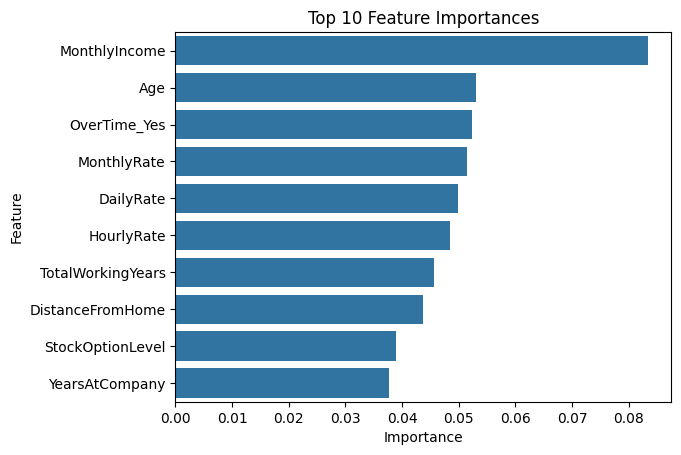

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
X = dataset.drop(columns=['Attrition'])
y = dataset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\ARFA TECH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
log_reg.score(X_train,y_train)*100,  log_reg.score(X_test,y_test)*100

(89.79343863912516, 85.92233009708737)

#DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(max_depth=15, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [58]:
dt.score(X_train,y_train)*100,  dt.score(X_test,y_test)*100

(100.0, 70.87378640776699)

RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=55)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=55)

In [62]:
rf.score(X_train,y_train)*100,  rf.score(X_test,y_test)*100

(100.0, 86.89320388349515)